In [ ]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [1]:
%matplotlib inline
import numpy as np
import scipy.linalg as sl
# we'll start using sparse matrices here
import scipy.sparse as sp
# and linear algebra functions designed for sparse matrices
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from pprint import pprint
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

Bad value in file '/home/jea4117/.config/matplotlib/matplotlibrc', line 1 ('backend: wkAgg'): Key backend: 'wkagg' is not a valid value for backend; supported values are ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


ModuleNotFoundError: No module named 'mpltools'

# Fluid Flow (part 2)  <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Differentiation-(or-taking-a-derivative)---the-continuous-definition" data-toc-modified-id="Differentiation-(or-taking-a-derivative)---the-continuous-definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differentiation (or taking a derivative) - the continuous definition</a></span></li><li><span><a href="#Finite-differences" data-toc-modified-id="Finite-differences-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Finite differences</a></span><ul class="toc-item"><li><span><a href="#The-forward-difference" data-toc-modified-id="The-forward-difference-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The forward difference</a></span></li><li><span><a href="#Taylor-series-to-estimate-accuracy" data-toc-modified-id="Taylor-series-to-estimate-accuracy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Taylor series to estimate accuracy</a></span><ul class="toc-item"><li><span><a href="#Taylor-series-example-[from-previous-lecture]" data-toc-modified-id="Taylor-series-example-[from-previous-lecture]-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Taylor series example [from previous lecture]</a></span></li><li><span><a href="#Order-of-convergence---higher-generally-better" data-toc-modified-id="Order-of-convergence---higher-generally-better-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Order of convergence - higher generally better</a></span></li></ul></li><li><span><a href="#The-backward-difference" data-toc-modified-id="The-backward-difference-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The backward difference</a></span></li><li><span><a href="#The-central-difference" data-toc-modified-id="The-central-difference-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>The central difference</a></span></li><li><span><a href="#Example:-Write-a-function-to-perform-numerical-differentiation" data-toc-modified-id="Example:-Write-a-function-to-perform-numerical-differentiation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Example: Write a function to perform numerical differentiation</a></span></li><li><span><a href="#Example:-Compute-the-derivative-of-$\sin(x)$" data-toc-modified-id="Example:-Compute-the-derivative-of-$\sin(x)$-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Example: Compute the derivative of $\sin(x)$</a></span></li><li><span><a href="#How-small-(or-large)-can-$\Delta-x$-go?" data-toc-modified-id="How-small-(or-large)-can-$\Delta-x$-go?-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>How small (or large) can $\Delta x$ go?</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Approximating-second-derivatives" data-toc-modified-id="Approximating-second-derivatives-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Approximating second derivatives</a></span></li></ul></li><li><span><a href="#Introduction-to-BVPs" data-toc-modified-id="Introduction-to-BVPs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction to BVPs</a></span><ul class="toc-item"><li><span><a href="#Problem-non-dimensionalisation" data-toc-modified-id="Problem-non-dimensionalisation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Problem non-dimensionalisation</a></span></li><li><span><a href="#Model-problem---BVP:-steady-state-advection-diffusion" data-toc-modified-id="Model-problem---BVP:-steady-state-advection-diffusion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model problem - BVP: steady-state advection-diffusion</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Methods-for-solving-BVPs" data-toc-modified-id="Methods-for-solving-BVPs-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Methods for solving BVPs</a></span></li><li><span><a href="#Defining-a-grid-(or-mesh)" data-toc-modified-id="Defining-a-grid-(or-mesh)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Defining a grid (or mesh)</a></span></li><li><span><a href="#Dealing-with-Dirichlet-boundary-conditions" data-toc-modified-id="Dealing-with-Dirichlet-boundary-conditions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dealing with Dirichlet boundary conditions</a></span></li><li><span><a href="#Solving-the-diffusion-equation" data-toc-modified-id="Solving-the-diffusion-equation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Solving the diffusion equation</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li></ul></li><li><span><a href="#The-time-independent-(steady)-advection-diffusion-problem" data-toc-modified-id="The-time-independent-(steady)-advection-diffusion-problem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The time-independent (steady) advection-diffusion problem</a></span><ul class="toc-item"><li><span><a href="#Discretisation-choices-for-advection-and-diffusion" data-toc-modified-id="Discretisation-choices-for-advection-and-diffusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Discretisation choices for advection and diffusion</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#More-observations" data-toc-modified-id="More-observations-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>More observations</a></span></li></ul></li><li><span><a href="#Upwind-for-advection" data-toc-modified-id="Upwind-for-advection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Upwind for advection</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Analysis-of-the-upwind-scheme-[$\star$]" data-toc-modified-id="Analysis-of-the-upwind-scheme-[$\star$]-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analysis of the upwind scheme [$\star$]</a></span></li><li><span><a href="#Practicalities!" data-toc-modified-id="Practicalities!-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Practicalities!</a></span></li></ul></li><li><span><a href="#The-time-dependent-(unsteady)-advection-diffusion-problem" data-toc-modified-id="The-time-dependent-(unsteady)-advection-diffusion-problem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The time-dependent (unsteady) advection-diffusion problem</a></span><ul class="toc-item"><li><span><a href="#The-equation-in-higher-spatial-dimensions-[$\star$]" data-toc-modified-id="The-equation-in-higher-spatial-dimensions-[$\star$]-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The equation in higher spatial dimensions [$\star$]</a></span></li><li><span><a href="#Non-dimensionalisation" data-toc-modified-id="Non-dimensionalisation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Non-dimensionalisation</a></span></li><li><span><a href="#The-Method-of-Lines" data-toc-modified-id="The-Method-of-Lines-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>The Method of Lines</a></span><ul class="toc-item"><li><span><a href="#Defining-a-spatial-grid" data-toc-modified-id="Defining-a-spatial-grid-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Defining a spatial grid</a></span></li></ul></li><li><span><a href="#Discretising-in-space" data-toc-modified-id="Discretising-in-space-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Discretising in space</a></span><ul class="toc-item"><li><span><a href="#Including-Dirichlet-boundary-conditions" data-toc-modified-id="Including-Dirichlet-boundary-conditions-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Including Dirichlet boundary conditions</a></span></li><li><span><a href="#The-initial-condition" data-toc-modified-id="The-initial-condition-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>The initial condition</a></span></li><li><span><a href="#The-(semi-)-discretised-system" data-toc-modified-id="The-(semi-)-discretised-system-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>The (semi-) discretised system</a></span></li></ul></li><li><span><a href="#The-semi-disrete-matrix-system" data-toc-modified-id="The-semi-disrete-matrix-system-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>The semi-disrete matrix system</a></span></li><li><span><a href="#Discretising-in-time" data-toc-modified-id="Discretising-in-time-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Discretising in time</a></span><ul class="toc-item"><li><span><a href="#Forward-Euler" data-toc-modified-id="Forward-Euler-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Forward Euler</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Example---advection-diffusion-of-a-Gaussian" data-toc-modified-id="Example---advection-diffusion-of-a-Gaussian-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Example - advection-diffusion of a Gaussian</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Periodic-boundaries" data-toc-modified-id="Periodic-boundaries-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Periodic boundaries</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-5.8.1"><span class="toc-item-num">5.8.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li></ul></li><li><span><a href="#Stability-considerations-(a-summary)" data-toc-modified-id="Stability-considerations-(a-summary)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stability considerations (a summary)</a></span><ul class="toc-item"><li><span><a href="#Cell-Peclet-number" data-toc-modified-id="Cell-Peclet-number-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Cell Peclet number</a></span></li><li><span><a href="#The-Courant-number-and-the-CFL-condition" data-toc-modified-id="The-Courant-number-and-the-CFL-condition-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>The Courant number and the CFL condition</a></span></li><li><span><a href="#The-CFL-condition---a-physical-interpretation-[$\star$]" data-toc-modified-id="The-CFL-condition---a-physical-interpretation-[$\star$]-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>The CFL condition - a physical interpretation [$\star$]</a></span></li><li><span><a href="#The-r-number/parameter-for-diffusion" data-toc-modified-id="The-r-number/parameter-for-diffusion-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>The r-number/parameter for diffusion</a></span></li><li><span><a href="#Other-time-stepping-options" data-toc-modified-id="Other-time-stepping-options-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Other time stepping options</a></span></li></ul></li><li><span><a href="#Final-comments" data-toc-modified-id="Final-comments-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final comments</a></span></li></ul></div>

## The simple balances from the previous lecture are not the end of the story even for flows in simple geometries – Why?


* An explicit assumption in these derivations is that the flow is steady (no time dependency)


* What happens if there is a perturbation in the flow?


* If this perturbation grows, it means that the flow can not be steady and that this assumption is invalid


* Perturbation will be damped if viscous forces are stronger than the inertial force associated with the perturbation


# Reynolds Number



* Reynolds number represents the balance between inertial and viscous forces


$$ Re \propto \frac{\text{Inertial Force}}{\text{Viscous Force}} \propto \frac{\rho v \frac{dv}{dx}}{\mu \frac{d^2 v}{d x^2}} \propto \frac{\rho v \frac{v}{x}}{\mu \frac{v}{x^2}}$$


$$ Re = \frac{\rho x v}{\mu}$$


* If Reynolds number is small perturbations are suppressed – Laminar Flow


* If Reynolds number is large perturbations grow – Turbulent Flow

### Reynolds Number – Flow in Pipe


* Pipe diameter as characteristic length scale


* Average velocity as characteristic velocity


$$ Re = \frac{\rho x v}{\mu}$$


$$
\begin{align}
\text{Laminar} \qquad &Re < 2100 \\
\text{Transition} \qquad &2100 < Re < 4000 \\
\text{Turbulent} \qquad &Re > 4000
\end{align}
$$
Laminar 

### Flow in Pipe


* As Reynolds number increases beyond transition average flow profile goes from parabolic to closer to plug flow

  * Laminar boundary layer near the wall – Gets thinner as the Reynolds number increases

  * Thickness of boundary layer also influenced by surface roughness

### Flow in Pipes – The Engineering Approach


* Fanning Friction factor:

  * Ratio of shear stress exerted on the fluid to its kinetic energy:


$$ f = \frac{\tau}{\rho \frac{v^2}{2}} $$


* For fully developed flow the shear stress on the wall must balance the pressure drop:


$$ \Delta P \pi R^2 = \tau 2 \pi R L $$


* Combine to give Fanning friction factor:


$$ f = \frac{\Delta P R}{L \rho v^2} $$


### Flow in Pipes – The Engineering Approach


* Friction factor is a function of Reynolds Number and pipe roughness:

  * For laminar flow $f = \frac{16}{Re}$

  * For turbulent flow empirical relationships or charts are use
  
  
  
Note that that Moody friction factor is often used instead of the Fanning friction factor, but it is simply 4 times larger

### Example


* A horizontal pipe needs to have water flow through it at $0.1 \text{ m}^3/\text{s}$

  * $\mu = 0.001 \text{ Pa} \cdot \text{s}$

  * $\rho = 1000 \text{ kg}/\text{m}^3$
  
  * The pipe has a diameter of $30 \text{ cm}$ and can be assumed to be smooth

  * If the pipe is $100 \text{ m}$ long, what pressure drop is required?

### Flow given a pressure drop


* More complex to calculate unless laminar 

A calculation tactic:


1. Guess a fluid velocity

2. Calculate Reynolds number

3. Look up the friction factor

4. Use the specified pressure drop to calculate a new fluid velocity based on the friction factor

5. Repeat from step 2 until sufficiently converged



You can do better than this successive substitution, but this simple tactic will work for most cases

### Example


* If we halve the pressure drop calculated in the previous example, what will the new flow rate be?

## Modelling other turbulent flows


* Pipe flow is a very special case for which lots of experimental data is available

  * We can use empirical relationships to accurately predict behaviour
  
 
What about turbulent flow in more complex geometries?



* Cannot readily rely on empirical data, especially if we want to use modelling for design


* We need to be able to understand and model turbulence

## What happens in Turbulent Flow?


* At high Reynolds numbers large scale flow structures and instabilities will develop smaller scale perturbations


* This cascade of larger perturbations generating smaller flow structures will continue down until the flow structures are small enough that viscosity can “win”
  
  * The Kolmogorov length scale


* At this finest level the energy in the flow is dissipated as heat via the viscosity

## Direct Numerical Simulation (DNS)


* Solve Navier-Stokes equation with enough resolution to resolve all the eddies down to their laminar cores

  * Very computationally expensive – prohibitively so for all but the lowest Reynolds numbers and smallest systems
  
  
* We can get a rough estimate of the resolution required based on Kolmogorov length scales and dimensional arguments


$$ \Delta x \sim \Bigg( L \left( \frac{\mu}{\rho \vert \mathbf{u} \vert } \right)^3 \Bigg)^{\frac{1}{4}} $$

$$ \text{Water at $1 \text{m}/\text{s}$ in a $1 \text{m}$ channel would require a resolution of about $10 \mu \text{m}$ (about $10^{15}$ elements in a cubic box)!} $$

## Turbulence Modelling


* As DNS is only useable on a small range of problems, we need to model the effect of turbulence


* Turbulence dissipates more energy than the macroscopic strain rate would suggest based only on the liquid viscosity

  * Need to calculate this extra dissipation


3 main approaches


* Simply increase the viscosity!

  * Trivial to do – often used in large scale simulations such as ocean modelling


* Assume that you can separate the turbulent and mean components of the flow

  * Reynold Average Navier Stokes (RANS) type models

  * We will look at the k-ε model as it is the most commonly used of this type


* Use a dynamic simulation in which you resolve as much of the turbulent dynamics as you can and then use a model for the bits you can’t resolve

  * Large Eddy Simulations (LES)


Both RANS and LES approaches involve the calculation of an additional turbulent viscosity that needs to be added onto the underlying fluid viscosity

## Mean and Fluctuating Flow Components


* Turbulent structures are typically embedded within macroscopic flow structures


* In analysing and modelling turbulence it is thus useful to distinguish between these flow components


* Assume that the flow at any point can be decomposed into a mean component and a fluctuating component:


$$ \mathbf{u} = \mathbf{U} + \mathbf{u}' $$

$$ \text{where $\mathbf{u}$ is the instantaneous velocity, $\mathbf{U}$ is the average velocity and $\mathbf{u}'$ is the fluctuating component of velocity} $$ 

## RANS version of the Navier Stokes Equation


$$ \rho \frac{D \mathbf{u}}{D t} = - \nabla p + \mu \nabla^2 \mathbf{u} + \rho \mathbf{g} $$


* Assume that there is a mean and fluctuating component of the velocity and pressure

  * Fluctuating component of pressure has no impact on final equation form


$$ \mathbf{u} = \mathbf{U} + \mathbf{u}' \qquad \qquad p = P + p' $$


* Substituting and applying the RANS averaging rules:


$$ \rho \frac{D \mathbf{U}}{D t} = - \nabla P + \mu \nabla^2 \mathbf{U} + \rho \mathbf{g} - \rho \nabla \cdot \overline{\mathbf{u}' \mathbf{u}'} $$


## Reynolds Stress Tensor


* The averaged equation is similar to the original Navier-Stokes equation except for the inclusion of the divergence of a rank 2 tensor:


$$ \rho \nabla \cdot \overline{\mathbf{u}' \mathbf{u}'} $$


* Known as the Reynolds Stress Tensor


$$ \rho \nabla \cdot \overline{\mathbf{u}' \mathbf{u}'} = \rho
\begin{pmatrix}
\overline{u' u'} & \overline{u' v'} & \overline{u' w'}\\
\overline{u' v'} & \overline{v' v'} & \overline{v' w'}\\
\overline{u' w'} & \overline{v' w'} & \overline{w' w'}
\end{pmatrix}   \qquad \qquad \mathbf{u}' = \{ u', v', w' \} $$

## Reynolds Stress Tensor


* Need to relate the Reynolds Stress Tensor to the mean flow
  
  * Know as the turbulence closure problem
  
  * No right way to do this, but some approximations are better than others


* The Reynolds Stress Tensor represents the transport of momentum due to the fluctuations in the flow


* In the standard Navier-Stokes equation the viscous stress term represents the “diffusion” of momentum

  * We can therefore think of Reynolds Stress Tensor in terms of a diffusion of momentum due to velocity fluctuations – a turbulent eddy viscosity

## Turbulent Eddy Viscosity


* Write the Reynolds Stress Tensor in terms of the macroscopic strain rate:


$$ \overline{\mathbf{u}' \mathbf{u}'} = - \nu_T \left( \nabla \mathbf{U} + \mathbf{U}^T \right) $$


* This means that you can combine the liquid viscosity and the turbulent losses into a single effective viscosity:

  * In turbulence modelling it is often more convenient to use the kinematic viscosity
  
$$ \nu_{effective} = \nu + \nu_T $$


* We now need to calculate this turbulent eddy viscosity

## Zero Equation Models


* The simplest type of turbulence model

  * Assume no explicit transport of turbulence


* Mainly based on dimensional arguments

  * $l_0$ is a turbulent length scale, $t_0$ is a turbulent time scale


$$ \nu_T = \frac{{l_0}^2}{t_0} $$


* Zero equation models are not very good in steady state RANS type models where the turbulent length scale is not well defined

  * Often adequate in LES models where the turbulent structures are resolved down to the grid resolution
  
    * Unresolved turbulent length scale similar to mesh resolution

    * Less transport of small scale turbulence before it is dissipated

## Zero Equation Models


* If we assume that we know the turbulent length scale, we still need the turbulent time scale from some macroscopic flow property

  * Two obvious candidates

    * Magnitude of the strain rate or magnitude of the vorticity

    * Both have units of inverse time


  * Based on strain rate – Smagorinsky model
  
  
  $$ v_T = \left( C_S l_0 \right)^2 \vert \mathbf{S} \vert $$


  $$ \mathbf{S} = \frac{1}{2} \left( \nabla \mathbf{U} + \mathbf{U}^T \right) $$


  * Based on vorticity – Baldvin-Lomaz model
  
  $$ v_T = \left( k l_0 \right)^2 \vert \boldsymbol{\omega} \vert $$

  $$ \boldsymbol{\omega} = \nabla \times \mathbf{U} $$

    * Less widely used than Smagorinsky – Useful in modelling boundary layers

    * In boundary layers k is a function of distance from the wall

## Two Equation Model


* We will revisit zero equation models in the context of LES


* For RANS modelling zero equation models are generally inadequate


* Need to consider the generation, transport and dissipation of turbulence

  * Two quantities can be used to model this
  
    * Turbulent kinetic energy − $k$
    
    * Turbulent dissipation rate − $\varepsilon$


  * So called $k − \varepsilon$ turbulence model
    
    * Other models exist, but this is one of the most widely used and illustrates the idea

## Turbulent Kinetic Energy − $k$


* The fluctuating components of the turbulence stores energy
  
  * This is known as the turbulent kinetic energy, k, which, per mass of fluid, can be written as follows:

$$ k = \frac{1}{2} \left( \overline{u'^2} + \overline{v'^2} + \overline{w'^2} \right) \qquad \qquad \mathbf{u}' = \{ u', v', w' \} $$
    
  * Note that the turbulent kinetic energy is therefore closely related to the Root Mean Square (RMS) of the velocity distribution


$$  u_{rms} = \sqrt{\overline{\vert \mathbf{u}' \vert ^2}} = \sqrt{ \overline{u'^2} + \overline{v'^2} + \overline{w'^2} } $$


* This turbulent kinetic energy is generated at the large scale and dissipated at the small scale

  * It can also be transported around the system by the mean flow

## Turbulent Dissipation Rate − $\varepsilon$


* This is equal to the viscous losses associated with the fluctuating component of the velocity


  * I.e. the rate at which the turbulent kinetic energy is converted into thermal energy


$$ \varepsilon = \nu \mathbf{S}' \cdot \mathbf{S}' \qquad \qquad \mathbf{S}' = \frac{1}{2} \left( \nabla \mathbf{u}' + \nabla \mathbf{u}'^T \right) $$


* While this is how the energy is dissipated, this equation is not directly useful as we do not know the fluctuating components (or their gradients)

## Equations for $k$ and $\varepsilon$


* Both the turbulent kinetic energy (k) and the dissipation rate (ε) can be transported, generated and destroyed and are represented by a pair of coupled ODEs

  * Don’t worry too much about how these are derived – note, though, the additional complexity associated with modelling turbulence
  
  
$$ \frac{\partial k}{\partial t} + \mathbf{U} \cdot \nabla k = \nabla \cdot \left( \frac{\nu_t}{\sigma_k} \nabla k \right) + 2 \nu_t \mathbf{S} \cdot \mathbf{S} - \varepsilon \qquad \qquad \mathbf{S} = \frac{1}{2} \left( \nabla \mathbf{U} + \nabla \mathbf{U}^T \right) $$
  
  
$$ \frac{\partial \varepsilon}{\partial t} + \mathbf{U} \cdot \nabla \varepsilon = \nabla \cdot \left( \frac{\nu_t}{\sigma_{\varepsilon}} \nabla \varepsilon \right) + C_{1 \varepsilon} \frac{\varepsilon}{k} \mathbf{S} \cdot \mathbf{S} - C_{2 \varepsilon} \frac{\varepsilon^2}{k}  \qquad \qquad \nu_T = C_{\mu} \frac{k^2}{\varepsilon} $$


The semi-empirical constants are typically assigned the following values:

$$ C_{\mu} = 0.09, \quad \sigma_k = 1.00, \quad \sigma_{\varepsilon}, \quad C_{1 \varepsilon} = 1.44, \quad C_{2 \varepsilon} = 1.92  $$

## Boundaries in Turbulence modelling


* At inlets both $k$ and $\varepsilon$ need to be assigned values

  * If appropriate values are not assigned, long inlet regions will be required


* At walls $k$ is zero (no slip), but the transition typically occurs over a very narrow boundary layer


* Typically need to model this boundary layer as it is usually computationally very expensive to explicitly resolve

## Large Eddy Simulations - LES


* Transient simulations that resolve as much of the dynamics as possible


* Zero equation models are usually appropriate

  * No time averaging or smoothing of equations above the grid resolution
  
  * If unresolved resolution is small then the assumption of no turbulent transport between generation and dissipation is appropriate
  
  
* Can use Smagorinsky model with length scale as the grid resolution


$$ \nu_T = \left(C_S \Delta x \right)^2 \vert \mathbf{S} \vert $$

## RANS vs LES


## Other Rheologies


* Thus far we have only considered Newtonian rheology

  * Shear stress proportional to the strain rate

  * A good approximation for many fluids, importantly including water and virtually all gases
  
  
* Other Rheologies are possible
  
  * Shear stress a more complex function of strain rate
  
  * Can also be a function of strain history
    
    * Thixotropic fluids

## Shear thinning


* Apparent viscosity decreases with strain rate

  * Quite common
    
    * Dense suspensions, emulsions, foams etc...

  * Sometimes called pseudo-plastic fluids


* Some physical origins:
  
  * Structures in the fluid can break down at high shears
    
    * E.g. some suspensions where particles can form flocs

  * Molecules align with or are extended in the shear direction

    * E.g. molten plastics

  * Particles in a fluid align with the flow and so move past one another more easily

## Yield Stress


* An extreme example of shear thinning are materials with a yield stress


* Below a yield stress a material does not flow and acts like a solid


* Above the yield stress the material flows and acts like a liquid


* Quite common

  * It is really a matter of the size of the yield stress

  * Logical extension of plastic deformation in a solid

## Shear thickening


* Apparent viscosity increases with strain rate

  * Much less common

    * Classic example is corn starch in water


* Some physical origins:

  * Structures in the fluid jam and can’t pass one another as easily at high strain rates


* Lots of current interest in shear-thickening fluids

  * Flexible protection and armouring

## Modelling non-Newtonian Rheologies


* Need to incorporate these rheologies into the Navier-Stokes equation

  * Require a relationship between shear stress and strain rate tensors


* Often easier to incorporate rheology as an apparent viscosity that depends on strain rate

  * Note that in most solvers it is the velocity (and thus strain rate) that is assumed to be known

## Power law fluid


* The simplest model for both shear thinning and shear thickening
  
  * The separation of the strain rate into two terms is so that stress tensor points in the correct direction
  
  
$$ \boldsymbol{\tau} = 2 k \vert 2 \mathbf{S} \vert ^{n-1} \mathbf{S} \qquad \qquad \mathbf{S} = \frac{1}{2} \left( \nabla \mathbf{u} + \nabla \mathbf{u}^T \right) $$


  - If n = 1 this is Newtonian
  - If n > 1 this is shear thickening
  - If n < 1 this is shear thinning
  

$$ \mu_{eff} = k \left| 2 \mathbf{S} \right| ^{n-1}  $$

* If the velocity is in the y direction and only changes in the x direction


$$ \boldsymbol{\tau} = k \frac{\partial u_y}{\partial x} \left| \frac{\partial u_y}{\partial x} \right| ^{n-1} $$


## Bingham Plastic
• The simplest type of yield behaviour is to assume that there is a yield
stress followed by a linearly increasing stress with increasing strain rate

## A digression – Fourier Series


* To find the analytical solution to Laplace’s equation we need to use Fourier Series


* Any function can be converted into an infinite series of sines and/or cosines

  * Tractable if function is either periodic or if we require a solution only over a finite extent
  
  
* If we only require the function to be approximated between $0$ and $L$, then the following version of the Fourier Series can be used:


$$ f(x) = \sum_{n=1}^\infty a_n sin \bigg( \frac{n \pi x}{L} \bigg) $$


$$ a_n = \frac{2}{L} \int_{0}^L f(x) sin \bigg( \frac{n \pi x}{L} \bigg) dx $$

## Fourier Series


Simple example -- Straight line


$$ f(x) = mx + c $$


Solve:


$$ a_n = \frac{2}{L} \int_{0}^L (mx + c) sin \bigg( \frac{n \pi x}{L} \bigg) dx $$


$$	
a_n = \begin{cases}
  - \frac{2 m L}{\pi n}  & \text{if } n \text{ is even} \\
  \frac{2 m L}{\pi n} + \frac{4 c}{\pi n} & \text{if } n \text{ is odd}
\end{cases}
$$

Try and obtain this yourself


### Calculate the Fourier series for $f(x) = mx +c$


Show that for range $0 < x < L$:


$$ f(x) = \sum_{n=1}^\infty a_n sin \bigg( \frac{n \pi x}{L} \bigg) \qquad \qquad a_n = \begin{cases}
  - \frac{2 m L}{\pi n}  & \text{if } n \text{ is even} \\
  \frac{2 m L}{\pi n} + \frac{4 c}{\pi n} & \text{if } n \text{ is odd}
\end{cases} $$






### Calculations

<function matplotlib.pyplot.show(close=None, block=None)>

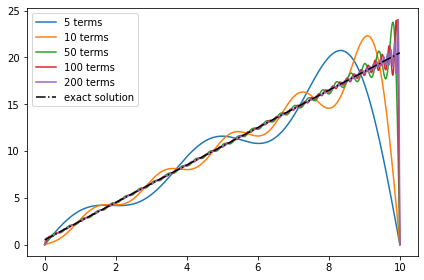

In [22]:
def f(x,m,c):
    # calculate the exact solution
    return m*x+c


def a(n, m, c):

    if n%2: # n modulo 2 = 1 (True) then Odd
        return 2.*m*L / (n* np.pi) + 4.*c / (n* np.pi)
    else:
        return -2.*m*L / (n* np.pi)

    
def fourier_approx(x, n, L, m, c):
    F = 0
    # The series starts from 1, so add 1 to the upper bound to ensure the correct number of terms
    for n_i in range(1, n + 1):
        F += a(n_i, m, c) * np.sin(n_i* np.pi* x/L)
    return F


def plot_approximation(x, n, L, m, c):
    for num_terms in n:
        y = []
        for x_i in x:
            y.append(fourier_approx(x_i, num_terms, L, m, c))
        plt.plot(x, y, label="%g terms" %num_terms)

L = 1
x = np.linspace(0, L, 1001)
n = [5, 10, 50, 100, 200]
m = 2
c = 0.5


plot_approximation(x, n, L, m, c)    
    
plt.plot(x, f(x, m, c), 'k-.', label="exact solution")
plt.legend()
plt.show
        

## Analytical Solutions to Laplace’s Equation


How to find analytical solutions

* Laplace’s equation is linear and therefore solutions to simpler problems can be combined:


$$ \varphi = \varphi_1 + \varphi_2 + \varphi_3 + \ldots $$


$$ 0 = \nabla^2 \varphi = \nabla^2 ( \varphi_1 + \varphi_2 + \varphi_3 + \ldots ) = \nabla^2 \varphi_1 + \nabla^2 \varphi_2 + \nabla^2 \varphi_3 + \ldots $$


* As long as the sum of the potentials satisfy the boundary conditions, the sum of the solutions to the individual Laplace’s equations will satisfy the overall system

## Analytical Solutions to Laplace’s Equation


* We will do 2D solutions as they are more tractable than a 3D analytical solution


* A useful trick for trying to find analytical solutions to PDEs is to convert them into ODEs (note that this is only typically possible for simple linear PDEs):


* Separation of variables

Lets write our potential out as the product of a function of x and a function of y (i.e. assume that the function is separable):


$$ \varphi = X(x)Y(y) $$


* Note that the overall problem might not have a solution of this form, but we may be able to combine multiple solutions of this form to give the overall solution

## Analytical Solutions to Laplace’s Equation


* How does this help: $\varphi = X(x)Y(y)$


$$ \frac{\partial^2 \varphi}{\partial x^2} = \frac{d^2 X(x)}{d x^2} \qquad \frac{\partial^2 \varphi}{\partial y^2} = \frac{d^2 Y(y)}{d y^2} $$


Note the change from partial to ordinary differential equations


* Therefore $\nabla^2 \varphi = 0$ implies that (assuming separability)


$$ \frac{1}{X(x)} \frac{d^2 X(x)}{dx^2} + \frac{1}{Y(y)} \frac{d^2 Y(y)}{dy^2} = 0 $$

## Analytical Solutions to Laplace’s Equation


* The equation now consists of the sum of two independent ODEs:


$$ 0 = \frac{1}{X(x)} \frac{d^2 X(x)}{dx^2} + \frac{1}{Y(y)} \frac{d^2 Y(y)}{dy^2} $$


* We can therefore solve these two ODEs independently with the proviso that the two solutions sum to zero everywhere.


* Since the functions are independent and operate in different directions, this implies that each of their solutions must be constant or else the sum would vary in different directions:


$$ \frac{1}{X(x)} \frac{d^2 X(x)}{dx^2} = \lambda \qquad \frac{1}{Y(y)} \frac{d^2 Y(y)}{dy^2} = - \lambda $$

## Analytical Solutions to Laplace’s Equation


Continued ...


$$ \frac{1}{X(x)} \frac{d^2 X(x)}{dx^2} = \lambda \qquad \frac{1}{Y(y)} \frac{d^2 Y(y)}{dy^2} = - \lambda $$


These have general solutions of the form (assuming that λ is a positive real number):


$$ X = \gamma \cosh(\lambda x) + \delta \sinh(\lambda x) $$


$$ Y = \alpha \cos(\lambda y) + \beta \sin(\lambda y) $$

## Analytical Solutions to Laplace’s Equation


* Note that because we have assumed the form for the potential, this is A solution, but not necessarily THE solution


* For a specific case, though, we can use the fact that Laplace's equation is linear to arrive at the THE solution by summing solutions of the previous form that match the various boundaries

## Analytical Solutions to Laplace’s Equation


* Example: Rectangle in which the potential at each side is specified.

Note that this method works for potentials that are arbitrary functions of position along the boundaries

## Analytical Solutions to Laplace’s Equation


$$ \varphi = \big( \gamma \cosh(\lambda x) + \delta \sinh(\lambda x) \big) \big( \alpha \cos(\lambda y) + \beta \sin(\lambda y) \big) $$


* What we need to do is find values for the constants that satisfy the boundaries:


* Because we can sum solutions, we can find a solution that satisfies one of the boundaries, while having all the other boundaries zero:


* $\varphi_1$ will be the solution where $\varphi_L$ is a function of position along the left hand boundary, while $ \varphi_R = \varphi_T = \varphi_B = 0 $

## Analytical Solutions to Laplace’s Equation


Since $\varphi_L$ has a value:


$$ \varphi_1 (0,y) = \varphi_L = \gamma \big( \alpha \cos (\lambda y) + \beta \sin (\lambda y) \big) $$


... this implies that $\gamma$ is non-zero for arbitrary values of $\varphi_L$


The bottom boundary is assumed zero:


$$ \varphi_1 (x,0) = 0 = \alpha \big( \gamma \cosh (\lambda x) + \delta \sinh (\lambda x) \big) $$


Since we know that $\gamma$ is non-zero, this implies that $\alpha = 0$

## Analytical Solutions to Laplace’s Equation


* The other two boundaries are a bit more complex: 


Top boundary:


$$ \varphi_1 (x,H) = 0 = \beta \sin (\lambda H) \big( \gamma \cosh (\lambda x) + \delta \sinh (\lambda x) \big) $$


* This means that $\lambda$ must be chosen such that $\lambda H$ is a half period of the $\sin$ wave ($\sin$ goes to zero at the half periods):


$$ \lambda = \frac{n \pi}{H} \qquad \text{where } n \text{ must be an integer} $$


## ## Analytical Solutions to Laplace’s Equation


RHS boundary: 


Top boundary:


$$ \varphi_1 (W,x) = 0 = \beta \sin \bigg( \frac{n \pi y}{H} \bigg) \Bigg( \gamma \cosh \bigg( \frac{n \pi W}{H} \bigg) + \delta \sinh \bigg( \frac{n \pi W}{H} \bigg) \Bigg) $$


Since $\beta \sin \big( \frac{n \pi y}{H} \big)$ is non-zero for an arbitrary $y$, this implies that the second term must be zero and therefore:


* This means that $\lambda$ must be chosen such that $\lambda H$ is a half period of the $\sin$ wave ($\sin$ goes to zero at the half periods):


$$ \delta = - \gamma \coth \bigg( \frac{n \pi W}{H} \bigg) $$

## Analytical Solutions to Laplace’s Equation


* Going back to the first boundary and substituting for what we know:


$$ \varphi_1(0,y) = \varphi_L = \gamma \sin \bigg( \frac{n \pi y}{H} \bigg) $$


* This is not able to be satisfied for an arbitrary value of $y$ using a single value of $n$, but we can luckily sum solutions as it is linear and we can therefore use a Fourier series, which is trivial for a constant $\varphi_L$ and readily solvable when $\varphi_L$ is a known function of position:


We need for $\gamma$ for each value of $n$:


$$ \varphi_1(0,y) = \varphi_L = \sum_{n=1}^\infty \gamma_n \sin \bigg( \frac{n \pi y}{H} \bigg) \qquad \qquad \gamma_n = \frac{2}{H} \int_0^H \varphi_L \sin \bigg( \frac{n \pi y}{H} \bigg) dy $$

## Analytical Solutions to Laplace’s Equation


* Substituting everything together:


$$ \varphi_1(0,y) = \varphi_L = \sum_{n=1}^\infty \gamma_n \sin \bigg( \frac{n \pi y}{H} \bigg)  \Bigg( \cosh \bigg( \frac{n \pi x}{H} \bigg) - \coth \bigg( \frac{n \pi W}{H} \bigg) \sinh \bigg( \frac{n \pi x}{H} \bigg) \Bigg)$$


$$ \gamma_n = \frac{2}{H} \int_0^H \varphi_L \sin \bigg( \frac{n \pi y}{H} \bigg) dy $$


* This is for one boundary only. You need to do a similar thing for each of the other boundaries and sum the solutions

  * Either follow this method for each boundary or, more easily, transform the coordinates to get the equations for the other boundaries

### Example


* $\varphi_2$ will be the solution where $\varphi_T$ is a function of position along the top boundary (i.e. where $y = H$), while $\varphi_L = \varphi_R = \varphi_B = 0$


* Find the solution by transforming the coordinates from the previous solution

### Deviations from Potential Flow


* Thus far we have assumed that the proportionality between the flux and the potential is constant

  * Constant conductivity in heat and electrical flow systems

  * Constant permeability in flow in porous media
  
  * Constant diffusivity in diffusive systems
  

* The proportionality can be a function of position
  
  * The material through which the flux is occurring varies spatially
  
  * Still a linear problem and readily solved


* The proportionality can be anisotropic
  
  * “Conductivity” is different in different directions
  
  * Arises when the material has a complex and anisotropic microstructure
  
  * Still a linear problem and thus also readily solvable

    * Depending on the form of the anisotropy can sometimes back to Laplace’s equation by suitable scaling of the position


* The proportionality is a function of the potential or other coupled dependent variable in the system

  * An example would be multi-phase flow in porous media where the permeability is a function of the saturation
  
  * Non-linear and therefore more complex to solve

### Prefactor that is a function of position


$$ \mathbf{v} = - k \nabla \varphi \qquad \qquad \nabla \cdot \mathbf{v} = 0 $$


* Looks like an advection-diffusion equation:


$$ \nabla^2 \varphi + \frac{1}{k} \nabla k \cdot \nabla \varphi = 0 $$


### Prefactor that is Anisotropic


* Prefactor can be represented by a rank 2 tensor

  * Tensor will be symmetric
  
  * Diagonal terms are equivalent to conventional permeability/conductivity, but with different values in different directions
  * Off diagonal terms are for fluxes induced by potential gradients in a different direction (e.g. flux in y direction induced by a potential gradient in the $x$ direction)

## The Tutorial


* In the tutorial we will be solving a problem defined in terms of stream functions


* The first step will be deriving the boundary conditions


* These can be used to obtain the infinite series solution to the problem


* You will then need to implement the infinite series solution in Python
  
  * You can, of course, only calculate a finite number of terms and will therefore need to decide how many are appropriate at each location

In [ ]:
def adv_central_periodic(N):
    """ Funtion to generate the NxN discretisation matrix for advection
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (U / dx).
    """
    Dx = 0.5*np.eye(N, k=1) - 0.5*np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dx[0, -1] = -0.5
    Dx[-1, 0] = 0.5
    return Dx

def diff_central_periodic(N):
    """ Funtion to generate the NxN discretisation matrix for diffusion
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (kappa / dx**2).
    """
    Dxx = np.eye(N, k=1) - 2*np.eye(N) + np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dxx[0, -1] = 1.
    Dxx[-1, 0] = 1.
    return Dxx

The interior rows of these matrices clearly take the form


$$D_x = \begin{pmatrix}
     &  &  &  &    \\
     \ddots & \ddots & \ddots &  &    \\    
     & -1/2 & 0 & 1/2 &     \\  
     &  & \ddots & \ddots  &  \ddots  \\  
     &  &  &  & 
\end{pmatrix}$$

and

$$D_{xx} = \begin{pmatrix}
     &  &  &  &    \\
     \ddots & \ddots & \ddots &  &    \\    
     & 1 & -2 & 1 &     \\  
     &  & \ddots & \ddots  &  \ddots  \\  
     &  &  &  & 
\end{pmatrix}$$


Let's test these changes on the Gaussian problem and check that as the "blob" moves out of the right-hand boundary it comes back in at the left.

In [ ]:
# physical parameters
Pe = 100
L = 1
U = 1
kappa = 1/Pe

# define spatial mesh
N = 500
dx = L / N
x = np.linspace(0, L, N)

# create discretisation matrix
Dx = adv_central_periodic(N)
Dxx = diff_central_periodic(N)
A = -(U / dx) * Dx + (kappa / dx**2) * Dxx

# define a time step size
dt = 0.0002

# this is a slightly larger dt value mentioned in the comments after the movie
#dt = 0.000201

# and compute and print some key non-dimensional parameters
dx = L / N
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('CFL:  {0:.5f}'.format(U*dt/dx))
print('r:    {0:.5f}'.format(kappa*dt/(dx**2)))

# define the end time and hence some storage for all solution levels
tend = 1
# assume a constant dt and so can define all the t's in advance
t = np.arange(0, tend, dt)
# and we can also set up a matrix to store the discrete solution in space-time
# with our a priori knowledge of the size required.
C = np.empty((len(x),len(t)))
# define an initial condition - a "blob" in the shape of a Gaussian
# and place it in the first column of the C matrix which stores all solution levels
C[:, 0] = np.exp(-((x-0.2)/0.05)**2)

# now let's do the time-stepping via a for loop
# we will need the identity matrix so define it once outside the loop
I = np.eye(len(x))
for n in range(len(t)-1):
    C[:, n+1] = (I + A * dt) @ C[:, n]
    
# set up figure
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-Diff time-dependent PDE solve', fontsize=16)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.1)

for i in np.arange(0, len(t), int(len(t)/5)):
    ax1.plot(x, C[:, i], '.-')

In [ ]:
# create an animation

from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, xlim=(0, 1), ylim=(-0.1, 1.1),
                      xlabel='$x$', ylabel='$C$',
                      title='Advection-diffusion of a Gaussian in a periodic domain')
# if we don't close the figure here we get a rogue frame under the movie
plt.close()

line, = ax1.plot([], [], 'b', lw=2)
time_text = ax1.text(0.78, 0.92, '', transform=ax1.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    line.set_data(x, C[:, i])
    time_text.set_text('time = %.3f' % (i*dt))
    return line, time_text


number_frames = 100
frames = np.arange(0, C.shape[1], int(len(t)/number_frames))
anim = animation.FuncAnimation(fig, animate, frames,
                               interval=50, blit=True, init_func=init)

HTML(anim.to_jshtml())

   
### Comments

- If you increase the time step size (even by just a tiny amount) in the case above you will see our simulation goes unstable as the $r$ parameter goes above 0.5. 


- Try a value of $\Delta t  = 0.00201$. Even though the still image is completely polluted by the later noise in the solution. Take a look at the corresponding movie to get an idea how the instability develops.


- Note that in this implementation we are storing the $C$ values at all time levels. This is useful for later plotting and for making movies, but might be too memory intensive. As this is a two time level scheme we only need to temporarily store the previous time level's solution. We could do this with something like

```Python
C = np.empty((len(x), 1))
# define an initial condition
C = np.exp(-((x-0.2)/0.05)**2)

for n in range(len(t)-1):
    C_prev = np.copy(C)
    C = (I + A * dt) @ C_prev
```


- Setting $U=0$ (or just not including the `Dx` matrix and corresponding function call) and you will see a solver for pure diffusion; similarly you can get an advection only solver by setting $\kappa=0$, although we know that this is likely to be unstable due to the infinite (cell) Peclet number and use of a central discretisation for advection. 

# Stability considerations (a summary)

So we hit a stability problem in the last example (when we made $\Delta t$ just a little larger). 

Given that we output three diagnostic quantities with each simulation above it may not be a surprise  that there are actually three "flavours" of stability we need to consider. There are three since there's quite a lot going on in this problem, compared to what we've seen in the IVP and the BVP parts of this module which effectively considered parts of the current problem in isolation.

Stability is a concept that essentially means that the inevitable discretisation errors that occur over a single time step or are localised to a single part of the spatial domain (e.g. in boundary layers we saw in the BVP section), do not "accumulate" or grow such that the quality and convergence of the overall numerical solve is compromised.

We'll now explain the three stability issues we need to be aware of in this context, and how to manage them.

## Cell Peclet number

We know from our work on BVPs that an issue with mesh sizes comes when we are dealing with a central difference for advection, and the solution varies substantially over a small distance, e.g. in a boundary layer, or simply a concentration type field with sharp changes in solution value.

Previously we quantified this in terms of the cell Peclet number where for stability of the central scheme we found that instabilities can occur if we break the following bound on this non-dimensional number:

$$Pe_c =  \frac{U\Delta x}{\kappa} < 2.$$

[Recall that an upwind discretisation essentially added enough numerical dissipation that the numerical solution was never allowed to get too steep between discrete solution locations].

In the current unsteady (time-dependent) advection-diffusion case this stability criterion is still present and valid for the same reasons as for the steady case we discussed previously.  [Although note that with a very stable time-stepping method it is possible that we can push this limit a little bit before wiggles cause us problems].


If your solution goes unstable (catastrophically so in that it "blows up", or just that it exhibits annoying/damaging wiggles) and through a study of key parameters such as the cell Peclet number you suspect that this phenomena is the problem, then you have three potential solutions:

<br>

1. Use a **finer mesh** (but this may be too costly)

<br>

2. Use a **different discretisation** (e.g. upwind) - but this may be too inaccurate, and so may need to be performed in tandem with option 1, and with a study of potential errors [NB. given the interplay between the discretisations of advection, diffusion and the time-derivative term, it is possible that changing the latter two could also help with stability, but likely in a similar manner to upwind through the effective addition of spurious additional numerical diffusion]

<br>

3. **Change the problem!** E.g. here you could specify a larger $\kappa$.  Now of course $\kappa$ is a physical quantity that is specified in the real world, changing physical parameters should therefore be done with caution and knowledge, and is really a topic for a course on "numerical *modelling*" rather that a course on "numerical methods" (cf. also the difference between model verification and model validation).

<br>

Now in practice you may well perform a combination of all three of these "solutions".  Some initially simply to understand the problem, and then you may iterate towards a practical solution which balances stability with your accuracy requirements and computational cost.


## The Courant number and the CFL condition

Recall that the stability criterion for the forward Euler method took the form

$$\left|\;1-\lambda\Delta t\;\right|<1, $$

where $\lambda$ was any one of the eigenvalues of the $A$ matrix in our linear ODE system (and with similar expressions for other time-stepping methods based on their "amplification factors").


We will, through consideration of the eigenvalues of our discretised system, see below that for our problem in the presence of advection this leads to what is termed the [**CFL condition**](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition) (after Courant, Friedrichs and Lewy): 

$$\frac{U\Delta t}{\Delta x} < 1, $$

where the term on the LHS is generally termed the **Courant number** (sometimes the notation $C$ is used - $C:=U\Delta t/L$).

We can also establish this stability criterion graphically/intuitively as we will do next.

But first note that if you suspect that this is the cause of an stability issues you again have several solutions:

<br>

1. Use a **smaller time step** (but as above, this may be too expensive).

<br>

2. **Change the time stepping method**, either for a different method with a more suitable stability region (cf. the stability region plots from the IVP lectures, and with suitability here being based on the locations of the eigenvalues in the complex plane and the corresponding size of the schemes' stability region in the real and the imaginary directions), e.g. an A-stable implicit method - but this will possibly come at the expense of additional computational costs, and in the case of an implicit method (as for upwinding) while you may get a stable solution it won't necessarily be accurate!

<br>

3. **Change the physics** of the problem - this is more difficult to achieve here than the suggestion above to change the value of diffusivity which we can sometimes get away with to a certain extent - we can't really justify changing the speed of advection. Although note that in compressible fluids people often artificially slow down the speed of sound purely for time stepping stability reasons!

<br>

4. Change $\Delta x$, e.g. **make the mesh coarser**.  We can do this, but only after giving due consideration to cell Peclet number related stability limits and of course required spatial accuracy!

<br>

5. Note also that addressing a cell Peclet number instability as suggested above with a finer mesh, while fixing that issue could then lead to a CFL related instability!  **All these issues/solutions are coupled** and we need to understand this to effectively set up and optimise a simulation set-up.  In general if you halve $\Delta x$, say to either fix an instability or investigate convergence/accuracy, you may be well advised to also halve the time step size so as to maintain a constant Courant number (see below for a slightly different piece of advise when diffusion dominates - when halving $\Delta x$ it may be advisable to divide the time step size by a factor of four). 

<div class="optional">

## The CFL condition - a physical interpretation [$\star$]

Further below we will derive the CFL condition through consideration of the eigenvalues of our discretisation matrix, 

but first it's useful to think about why it makes perfect sense from a more physical/geometrical perspective.

<br>

Consider the following schematic showing our discretisation stencil

<img src="figures/CFL_schematic.svg" style="width: 700px">

<br>

A **domain of dependence** for an equation is defined as those points at earlier times which have an influence on the solution at a single point at a later time.

For this schematic, in grey we identify the numerical *domain of dependence*. This is clear from the stencil we are using - only the points $i-1$, $i$ and $i+1$ at the earlier time impact on the value at point $i$ at the new time level. So in this case the domain of dependence is a triangle extending backwards from the point in question to cover the three nodes at the earlier time.

We can also define the *domain of dependence* for the continuous problem based on the speed of information propagation, e.g. the speed with which advection (or any other physical process whereby information in transmitted, e.g. through waves) propagate.

The CFL condition essentially states that a numerical method can be convergent only if its **numerical domain of dependence contains the true domain of dependence of the PDE**. If this is not the case then the numerical method will essentially be missing information in each of its time step updates.

From the schematic we can see that the maximum speed which information can propagate in this discrete scheme is given by the slopes of the grey triangle: $\Delta x/\Delta t$ [note this has the units we might expect!] - with this stencil and method information can propagate a maximum of spatial cell size per time step.

Now in the case of advection with speed $U$, information propagates at the speed $U$. Hence here for the CFL condition to hold we need that 

$$ \frac{\Delta x}{\Delta t} > U,$$

which is more commonly written as

$$C:=\frac{U \Delta t}{\Delta x} < 1. $$

More generally, all explicit time-stepping methods will be subject to a CFL condition of the form

$$C < C_{\text{max}}. $$

</div>

## The r-number/parameter for diffusion

*Information* also propagates through diffusion (there are different "models" for diffusion, Fickian diffusion is the common one: <https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion>).

A *characteristic* time scale for this diffusive process can be given by 

$$ \tau_d : = \frac{\Delta x^2}{\kappa}. $$

From this we can define the so-called r-number or r-parameter

$$ r: =  \frac{\kappa \Delta t}{\Delta x^2},$$

[check units] and, similar to the CFL condition, we need to ensure that information can propagate sufficiently quickly on our mesh, and thus by the same logic as above we arrive at a stability bound of the form

$$ r < r_{\text{max}},$$

[we will see below that $r_{\text{max}} = 1/2$ for the discretisation options we have so far considered (i.e. FTCS in the language introduced next)].

<br>

Some comments on this:

1. Depending on whether advection or diffusion dominate the physics of our problem, this may or may not be a harsher constraint on the allowable time step sizes. Note that $r$ and the Courant number $C$ are related via the cell Peclet number:

$$ \frac{C}{r} = \frac{ \frac{U \Delta t}{\Delta x} }{ \frac{\kappa \Delta t}{\Delta x^2} } 
= \frac{U \Delta x}{\kappa} = Pe_c.$$


2. Note a big difference now though is that $r$ contains the mesh size squared. So the advice above for CFL where when halving the mesh size you may be advised to also halve the time step, when diffusion is dominant you may actually need to divide by a factor of 4!

## Other time stepping options

Since we have followed a method of lines semi-discretisation approach we can decouple the choice of spatial discretisation from time-stepping. The approach we used above has the short-hand title FTCS, meaning forward in time and centred in space, but we have other options available to us, including:


\begin{align}
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\boldsymbol{c}^{n}\;\; && \text{FTCS: forward in time (FE, or RK1/AB1), central in space}\\ 
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\boldsymbol{c}^{n+1}\;\; &&  \text{BTCS: backward in time (BE, or AM0), central in space}\\
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= \frac{1}{2}A\left(\boldsymbol{c}^{n+1} + \boldsymbol{c}^{n}\right)\;\; &&  \text{Crank-Nicolson (AM2)}\\
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\left(\theta\boldsymbol{c}^{n+1} + (1-\theta)\boldsymbol{c}^{n}\right)\;\; &&  \text{Theta method}
\end{align}

where $\theta$ can be chosen in $[0,1]$ and of course includes the first three schemes with the choices $0$, $1$ and $1/2$.

Of course through the use of either multi-step or multi-stage methods (as seen in earlier lectures) a huge number of time-stepping options are open to us.

# Final comments


1. We have developed a systematic means of approximating derivatives using the finite difference method.


2. We can derive approximations of derivatives of arbitrary convergence order given a large enough stencil, but this comes at higher computational cost.


3. When solving BVPs (and more generally PDEs) this order/stencil size impacts upon the degree of sparseness of the matrix systems we need to solve, and hence impacts on computational cost.


4. Stability is major issue, and to avoid this we need sufficient mesh resolution to resolve the variability of the solution, otherwise we observe wiggles or under/over-shoots which can ultimately ruin a simulation.


5. Variable resolution is one solution, the use of upwinding is another.


6. Upwinding is robust but comes at the cost of reduced (order of) accuracy as well as the addition of spurious numerical dissipation.


7. The grid/cell Peclet number provides a diagnostic quantity that can be used as a means to assess whether we expect wiggles (in the central differencing case) or excessive numerical dissipation (in the upwind case).


8. We brought together ideas, including from ODE solvers, to develop finite difference based solvers for unsteady advection-diffusion in one spatial dimension.


9. This allowed us to define, appreciate, and investigate three key stability issues.


10. Advection-diffusion has many similarities with fluid dynamics - ALL of the concepts introduced today are also critical to the massive field of ***computational fluid dynamics (CFD)*** in its broadest terms - the issues and the potential solutions discussed are all highly relevant to CFD.


11. We introduced the concept of periodic boundaries, effectively as a numerical approach to avoid boundaries; physically periodic boundaries are also employed to effectivly simulate an infinite domain.